In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Instructions 

1. This assignment relies on [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) for the data.
2. You will need to ensure that your proxy settings are correct if used within wits.

### Question 1
Below we construct a line plot showing the relationship between crime
and murders in South Africa in $2014/2015$ for each province. The data 
is read from the csv file ```vocs2014!2015house_F1.csv```. If you don't have 
the file then download it from Sakai and place it in the same directory as your
Jupyter notebook.

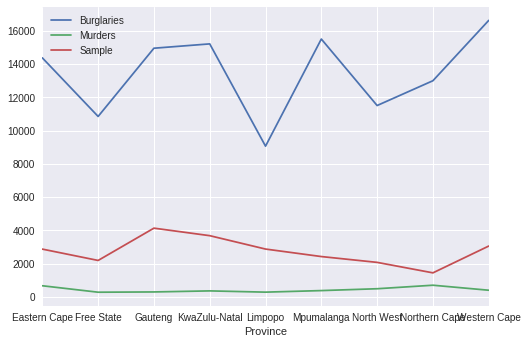

In [2]:
import pandas as pd
df_crime = pd.read_csv('vocs2014!2015house_F1.csv')
df_crime['Province'] = df_crime.PROV.map({1:'Western Cape',
                                          2:'Eastern Cape',
                                          3:'Northern Cape',
                                          4:'Free State',
                                          5:'KwaZulu-Natal',
                                          6:'North West',
                                          7:'Gauteng',
                                          8:'Mpumalanga',
                                          9:'Limpopo'})
df_crime['Burglaries'] = df_crime['Q10bHous']==1
df_crime['Murders'] = df_crime['Q10fMurder']==1
df_crime['Sample'] = 1
df_crime = df_crime[['Province','Burglaries','Murders', 'Sample']].groupby('Province').sum()
df_crime['Burglaries'] /= df_crime['Sample']/100000
df_crime['Murders'] /= df_crime['Sample']/100000
df_crime.plot()
plt.show()

#### Question 1.a [5]
The above plot is not very meaningful as a line plot. Try to replicate the results 
from slides [Multivaraiate Data Visualizations, slide $9$], for South Africa. 
Has your bubble plot got the correct size bubbles?

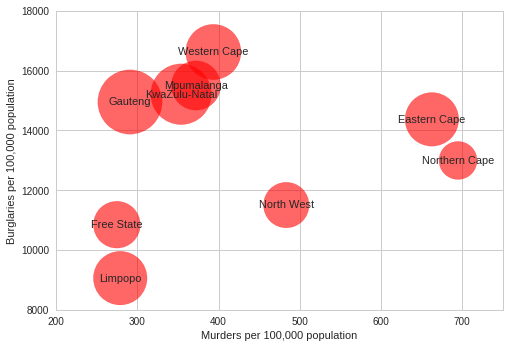

In [3]:
### BEGIN SOLUTION
sns.set(style="whitegrid", color_codes=True)
ax = df_crime.plot.scatter(x='Murders', y='Burglaries', s=df_crime.Sample, c='red', alpha=0.6)
for province in df_crime.index.values: 
    ax.text(x=df_crime['Murders'][province], y=df_crime['Burglaries'][province], 
            s=province, size=11, verticalalignment='center', 
            horizontalalignment='center')
plt.axis([200,750,8000,18000])
plt.xlabel('Murders per 100,000 population')
plt.ylabel('Burglaries per 100,000 population')
plt.show()
### END SOLUTION

### Question 2
Below we fetch data from the the world bank:
1. [Life Expectancy](http://data.worldbank.org/indicator/SP.DYN.LE00.IN?view=chart)
1. [Income Per Person](http://data.worldbank.org/indicator/NY.ADJ.NNTY.PC.CD?view=chart)
1. [Population](http://data.worldbank.org/indicator/SP.POP.TOTL?view=chart)

we also get the country codes from the file ```wb_country_codes.csv``` which
can be found on Sakai.

In [4]:
# from pandas_datareader import wb
# df_tmp = wb.download(indicator=['SP.DYN.LE00.IN', 'NY.ADJ.NNTY.PC.CD','SP.POP.TOTL'], country='all', start=2012, end=2012)
# df_tmp = df_tmp.groupby(level=0).first().dropna()
# df_tmp.rename(columns={'SP.DYN.LE00.IN':'Life Expectancy',
#                                'SP.POP.TOTL':'Population',
#                                'NY.ADJ.NNTY.PC.CD':'Income Per Person' }, inplace=True)
# df_tmp.to_csv('df_life_vs_gdp.csv')
df_tmp = pd.read_csv('df_life_vs_gdp.csv', index_col='country')
df_country_codes = pd.read_csv('wb_country_codes.csv', index_col='Economy')
df_life_vs_gdp = df_tmp.join(df_country_codes)[['Life Expectancy','Income Per Person','Population','Code','Region','Income group']].dropna()

In [5]:
df_life_vs_gdp.head()

,Life Expectancy,Income Per Person,Population,Code,Region,Income group
country,,,,,,
Afghanistan,59.679610,600.913665,30696958.0,AFG,South Asia,Low income
Albania,77.443976,3641.847343,2900401.0,ALB,Europe & Central Asia,Upper middle income
Algeria,74.324098,4420.227948,37565847.0,DZA,Middle East & North Africa,Upper middle income
Angola,51.464000,1400.864820,25096150.0,AGO,Sub-Saharan Africa,Upper middle income
Argentina,75.816244,11206.976227,42096739.0,ARG,Latin America & Caribbean,Not classified


We can use the above data to emulate the charts from slides 
[Multivaraiate Data Visualizations, slide $10$ and $12$]

In [6]:
sns.set(style="whitegrid", color_codes=True)
ax = df_life_vs_gdp.plot.scatter(y='Life Expectancy', x='Income Per Person', 
                                 s=df_life_vs_gdp.Population/1e6, 
                                 cmap='tab20c', c=range(0, len(df_life_vs_gdp.index)), 
                                 alpha=0.6, figsize=(16,8))
plt.xscale('log')
plt.xlabel('Income per Person in US Dollars (GDP/capita, PPP$ inflation adjusted, log scale)')
plt.ylabel('Life Expectancy in years')
plt.show()

ValueError: Colormap tab20c is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

#### Question 2.a [5]
Unfortunately the chart lacks context. Mark the BRICS countries on the chart.

In [7]:
### BEGIN SOLUTION
sns.set(style="white")
ax = df_life_vs_gdp.plot.scatter(y='Life Expectancy', x='Income Per Person', 
                                 s=df_life_vs_gdp.Population/1e6, cmap='tab20c',
                                 c=range(0, len(df_life_vs_gdp.index)), 
                                 alpha=0.6, figsize=(16,8))
for country in ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']:
    ax.text(x=df_life_vs_gdp['Income Per Person'][country], 
            y=df_life_vs_gdp['Life Expectancy'][country], 
            s=country, size=11, verticalalignment='center')
plt.xscale('log')
plt.xlabel('Income per Person in US Dollars (GDP/capita, PPP$ inflation adjusted, log scale)')
plt.ylabel('Life Expectancy in years')
plt.show()
### END SOLUTION

ValueError: Colormap tab20c is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

#### Question 2.b [5]
The use of the color map is completely arbitrary. Take the BRICS marked plot and map the Region of the 
data point as the colour for each bubble. 

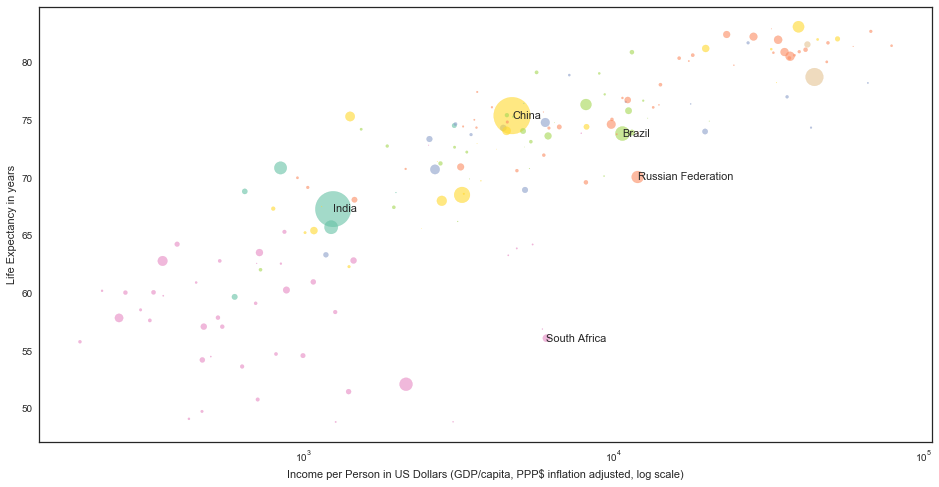

In [22]:
### BEGIN SOLUTION
sns.set(style="white")
# Unique category labels for Province
color_labels = df_life_vs_gdp.Region.unique()
# List of RGB triplets
rgb_values = sns.color_palette("Set2", 7)
# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))
ax = df_life_vs_gdp.plot.scatter(y='Life Expectancy', x='Income Per Person', 
                                 s=df_life_vs_gdp.Population/1e6, 
                                 c=df_life_vs_gdp.Region.map(lambda x: color_map[x]), 
                                 alpha=0.6, figsize=(16,8))
for country in ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']:
    ax.text(x=df_life_vs_gdp['Income Per Person'][country], 
            y=df_life_vs_gdp['Life Expectancy'][country], 
            s=country, size=11, verticalalignment='center')
plt.xscale('log')
plt.xlabel('Income per Person in US Dollars (GDP/capita, PPP$ inflation adjusted, log scale)')
plt.ylabel('Life Expectancy in years')
plt.show()
### END SOLUTION

### Question 3
Through some web scarping and cut and pasting we have been able to acquire some 
data for the PSL $2016/2017$. The data resides in the file ```'psl_player_stats.csv'```.
1. If you dont have the file download it from Sakai
1. Place the file in the same folder as this Jupyter Notebook.

In [23]:
df_tmp = pd.read_csv('psl_player_stats.csv')
df_goals = df_tmp[df_tmp.columns[0:5]].drop_duplicates()
df_goals.set_index('Player_Goals', inplace=True)
df_cards = df_tmp[df_tmp.columns[6:11]].drop_duplicates()
df_cards.set_index('Player_Cards', inplace=True)
df_assists = df_tmp[df_tmp.columns[12:]].drop_duplicates()
df_assists.set_index('Player_Assists', inplace=True)
df_psl = df_goals.join(df_assists).dropna().join(df_cards)[[
            'Goals', 'Penalty', 'First Goal','Appearances', 
            'Assists', 'Yellow card', 'Red card','Pts']].fillna(0)
#df_psl = (df_psl_tmp.T / df_psl_tmp.Appearances).T[[
#            'Goals', 'Penalty', 'First Goal', 
#            'Assists', 'Yellow card', 'Red card','Pts']]

In [24]:
df_psl.head()

,Goals,Penalty,First Goal,Appearances,Assists,Yellow card,Red card,Pts
Player_Goals,,,,,,,,
L. Manyama,13.0,2.0,6.0,27.0,3.0,7.0,0.0,7.0
R. Ramagalela,10.0,0.0,7.0,28.0,5.0,0.0,0.0,0.0
K. Billiat,8.0,0.0,4.0,19.0,7.0,3.0,0.0,3.0
J. Brockie,8.0,3.0,1.0,27.0,4.0,2.0,0.0,2.0
L. Lamola,7.0,0.0,3.0,27.0,4.0,2.0,0.0,2.0


#### Question 3.a [5]
Produce a heatmap similar to the one found in [Multivaraiate Data Visualizations, slide$-16$]. 
The one in the slides is for basketball. The field ```Pts``` in our data is a points
calculation that gives $1$ point for a Yellow Cards and $2$ points for a Red Card.
* Note: I would suggest you use Seaborn  for this task

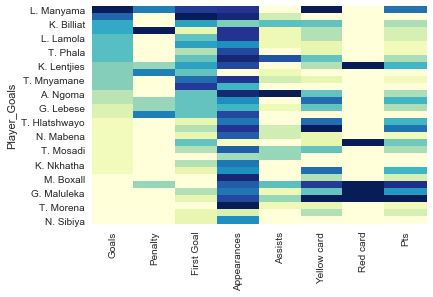

In [25]:
### BEGIN SOLUTION
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_psl)
df_scaled = pd.DataFrame(x_scaled, index=df_psl.index, columns=df_psl.columns)
sns.heatmap(df_scaled, cbar=False, cmap="YlGnBu")
plt.show()
### END SOLUTION

#### Question 3.b [5]
Another way to visualize the PSL data would be to use a parallel coordinates plot. Produce the plot below.

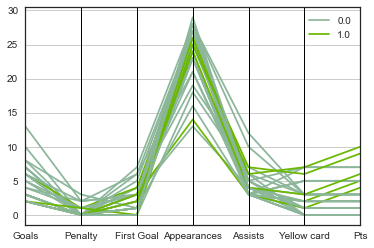

In [26]:
### BEGIN SOLUTUION
from pandas.plotting import parallel_coordinates
parallel_coordinates(df_psl, 'Red card')
plt.show()
### END SOLUTION

### Question 4
We now have taken the entire crime data set for $2014/2015$. The data file is:
```
'vocs2014!2015.csv'
```
You can see the table of data below. Once again we have standardized the data for population size.

In [27]:
df_crime = pd.read_csv('vocs2014!2015.csv')
df_crime['Province'] = df_crime.PROV.map({1:'Western Cape',
                                          2:'Eastern Cape',
                                          3:'Northern Cape',
                                          4:'Free State',
                                          5:'KwaZulu-Natal',
                                          6:'North West',
                                          7:'Gauteng',
                                          8:'Mpumalanga',
                                          9:'Limpopo'})
df_crime['Population'] = 1
df_crime = df_crime[['Q10aCar', 'Q10cHomeRob', 'Q10dLiveStck',
       'Q10ecrops', 'Q10fMurder', 'Q10hDamageDU',
       'Q10iDamageVeh', 'Population',
       'Province']].groupby('Province').sum()
df_pop = df_crime.Population.copy()
df_crime = df_crime.div(df_crime['Population'], axis='index')
df_crime['Population'] = df_pop
df_crime

,Q10aCar,Q10cHomeRob,Q10dLiveStck,Q10ecrops,Q10fMurder,Q10hDamageDU,Q10iDamageVeh,Population
Province,,,,,,,,
Eastern Cape,2.016045,1.987792,1.926404,2.018486,2.032438,2.030345,2.050924,2867
Free State,2.021968,2.012815,2.000915,2.040275,2.045309,2.032952,2.050343,2185
Gauteng,2.022777,2.020354,2.095469,2.085292,2.081900,2.124788,2.118488,4127
KwaZulu-Natal,2.011156,2.005170,2.004898,2.051429,2.049796,2.061497,2.058776,3675
Limpopo,2.024042,2.004878,2.037979,2.052265,2.055749,2.108711,2.080139,2870
Mpumalanga,2.070277,2.016949,2.062836,2.109963,2.120711,2.107482,2.119471,2419
North West,2.029000,2.007733,2.008217,2.046883,2.052682,2.054616,2.060899,2069
Northern Cape,2.011119,1.984712,1.988881,2.028492,2.027102,2.013899,2.025712,1439
Western Cape,1.980000,1.970820,2.020984,2.020000,2.028197,2.017705,2.000000,3050


#### Question 4.a [5]
You should produce the best possible scatter matrix for this data. 

C:\Users\tvanzyl\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


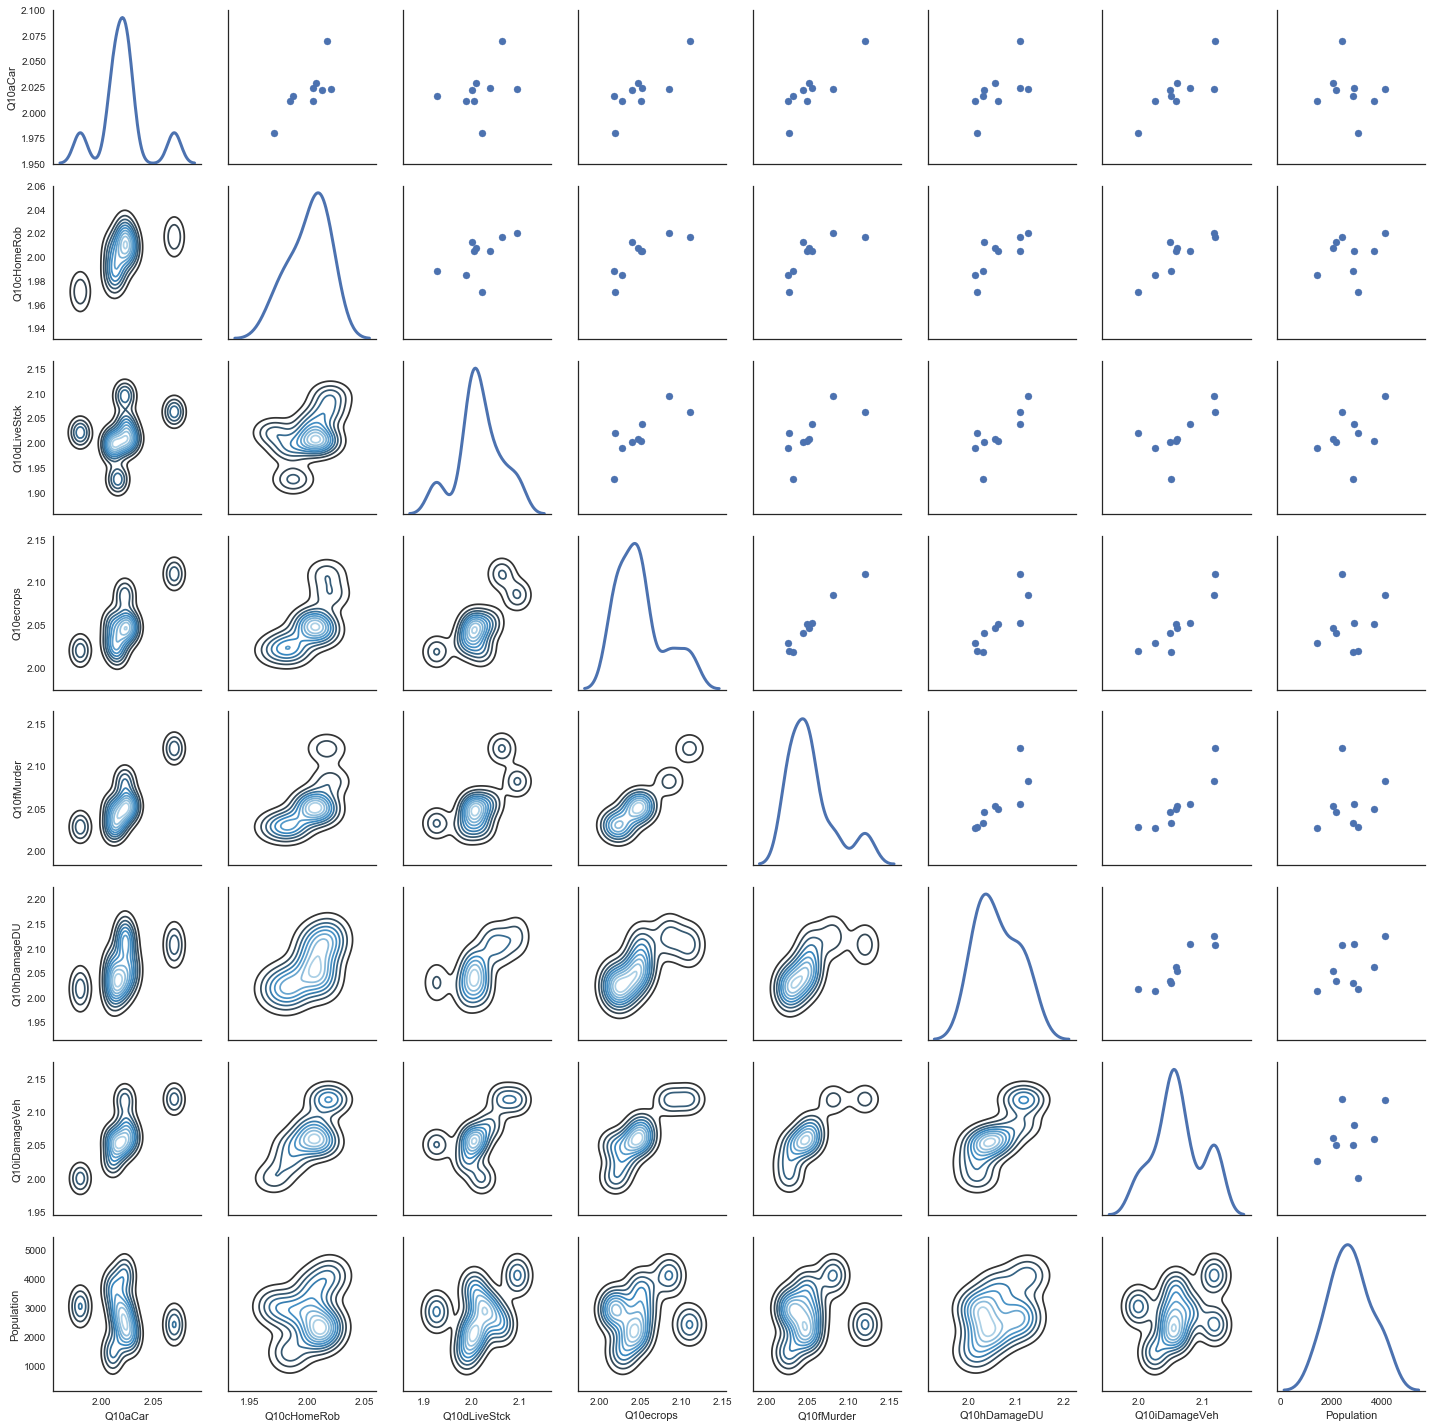

In [28]:
### BEGIN SOLUTUION
sns.set(style="white")
g = sns.PairGrid(df_crime, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()
### END SOLUTION